In [27]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
conn = psycopg2.connect("dbname=fleebmarket user=fleebmarket")

In [28]:
cur = conn.cursor()


In [29]:
cur.execute("SELECT title, extra -> 'offers' from search_app_redditadvert where ad_type = 'Selling' limit 1;")
cur.fetchall()

[('[AU] [H] gmk bleached , gmk sandstorm , gmk nautilus nightmares, rama artisans [W] Paypal',
  'gmk bleached , gmk sandstorm , gmk nautilus nightmares, rama artisans')]

In [30]:

cur.execute("ROLLBACK")

In [31]:
cur.execute("SELECT title, extra -> 'offers' from search_app_redditadvert where ad_type = 'Selling' limit 1;")


In [32]:
cur.execute("SELECT author, c from (select author, count(*) as c from search_app_redditadvert where ad_type = 'Selling' group by author) as T where c > 2;")
data = cur.fetchall()


In [33]:
authors_df = pd.DataFrame(data, columns=["author", "count"])
authors_df

,author,count
0,captinfapin,5
1,savageastr0naut,8
2,faagtfook,3
3,TieuNgu,6
4,shnizlon,3
...,...,...
2696,bigislittle,5
2697,HavocHybrid,8
2698,domasleo,4
2699,jeefixD,3


<AxesSubplot:>

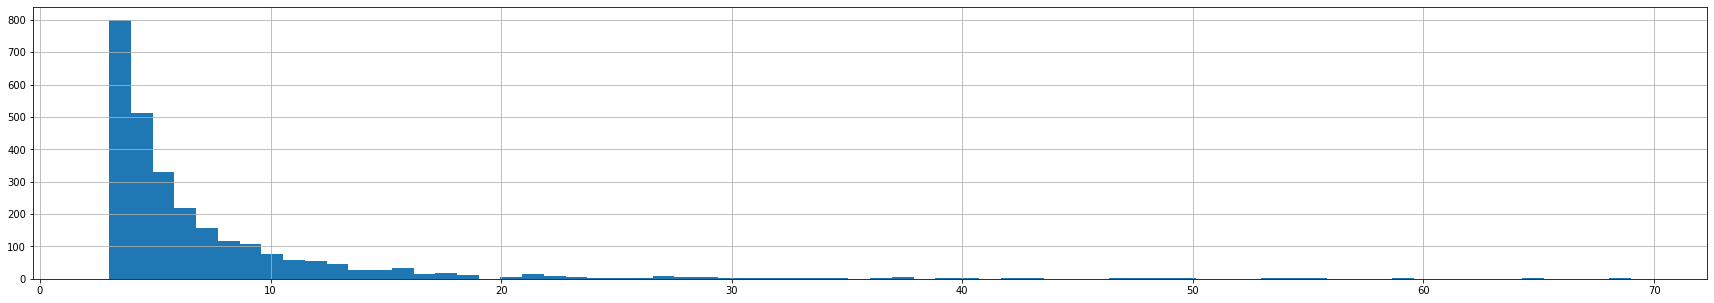

In [34]:
authors_df['count'].hist(bins = 70, figsize=(30,5))

In [35]:
authors_list = ','.join([
    f"'{author}'" for author in authors_df['author']
])
cur.execute(f"SELECT author, extra -> 'offers', created_utc from search_app_redditadvert  where author in ({authors_list}) and ad_type = 'Selling' order by created_utc desc;")
data = cur.fetchall()
df = pd.DataFrame(data, columns=['author', 'offers', 'date'])
df

,author,offers,date
0,btlO_O,Artisans,2022-01-22 09:40:14+00:00
1,mochixlatte,Stock 90x Zaku Switches,2022-01-22 09:30:22+00:00
2,YoungChipper,"Fully Built WK Mr Suit Babypowder Black, 80x G...",2022-01-22 05:50:49+00:00
3,ltsnotluck,KBD67 Lite FR4 Plate,2022-01-22 05:32:03+00:00
4,Leov2,GMK Bushido / Tofu65 w/ Gat Ink Black v2 / Blu...,2022-01-22 05:23:34+00:00
...,...,...,...
17992,fartnaround,KBD fans 5 degree with DZ60rgb hot swappable,2021-05-10 13:35:00+00:00
17993,oli4731,Tofu WKL Black w/ Koalas L&F,2021-05-10 13:18:04+00:00
17994,ds2465,Grey 7v + Extras,2021-05-10 13:03:46+00:00
17995,siwankim,Maple story Artisan keycaps: White yeti,2021-05-10 12:41:07+00:00


In [37]:
df_by_author = [
    df[df['author'] == author] 
    for author in authors_df['author']
]

In [39]:
from fuzzywuzzy import fuzz

In [40]:
def compute_similarity(row):
    rows = df[df['author'] == row['author']]
    first = rows.iloc[0]['offers']
    return fuzz.partial_ratio(first, row['offers'])

In [41]:
df['ratio'] = df.apply(compute_similarity, axis='columns')

In [42]:
df

,author,offers,date,ratio
0,btlO_O,Artisans,2022-01-22 09:40:14+00:00,100
1,mochixlatte,Stock 90x Zaku Switches,2022-01-22 09:30:22+00:00,100
2,YoungChipper,"Fully Built WK Mr Suit Babypowder Black, 80x G...",2022-01-22 05:50:49+00:00,100
3,ltsnotluck,KBD67 Lite FR4 Plate,2022-01-22 05:32:03+00:00,100
4,Leov2,GMK Bushido / Tofu65 w/ Gat Ink Black v2 / Blu...,2022-01-22 05:23:34+00:00,100
...,...,...,...,...
17992,fartnaround,KBD fans 5 degree with DZ60rgb hot swappable,2021-05-10 13:35:00+00:00,37
17993,oli4731,Tofu WKL Black w/ Koalas L&F,2021-05-10 13:18:04+00:00,36
17994,ds2465,Grey 7v + Extras,2021-05-10 13:03:46+00:00,56
17995,siwankim,Maple story Artisan keycaps: White yeti,2021-05-10 12:41:07+00:00,33


In [47]:
df[(df['ratio'] > 10) & (df['ratio'] < 20) ]

,author,offers,date,ratio
1654,tarentules,"ID80, ID87v2, Alice",2021-12-31 20:27:18+00:00,17
1992,joxman0,Rama KARA Iced,2021-12-26 23:34:45+00:00,15
2003,jiv_,Realforce 84u,2021-12-26 21:19:17+00:00,15
2254,OCDsquad1,Inett Square.X 60 white,2021-12-22 13:58:38+00:00,17
2340,asquid00,Gateron Ink Kangaroo,2021-12-21 03:35:10+00:00,19
...,...,...,...,...
17494,nuite,"Rama Artisans (Ishtar, KAT Cyberspace), Quartz...",2021-05-19 21:50:28+00:00,19
17551,bigazoz,Black Boba U4T 62g,2021-05-18 23:19:16+00:00,17
17789,Fillan05,ePBt x GOK BoW,2021-05-14 17:47:49+00:00,14
17961,ColdTravel,Springs,2021-05-10 23:47:17+00:00,14


In [52]:
letters = 'abcdefghijklmnopqrstuvwxyz'
numbers = '0123456789'
letters_u = letters.upper()

def extra_chars(words_str):
    chars = set(words_str)
    return chars - set(letters) - set(numbers) - set(letters_u)

In [55]:
df['extra_chars'] = df['offers'].apply(extra_chars)
set().union(*df['extra_chars'])

{' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '\\',
 '^',
 '_',
 '|',
 '~',
 '°',
 '²',
 '³',
 '×',
 'æ',
 'é',
 'í',
 'ó',
 'ö',
 'ō',
 '’',
 '“',
 '”',
 '…',
 '\u2063',
 'カ',
 'ス',
 'タ',
 'ム',
 '（',
 '）',
 '🐼',
 '🦙'}

In [96]:
# chars_to_space = {'!\"#$%&\'()*+,-./:;<=>?\\^_|~’“”（）'}
chars_to_space = [',', '|', 'w/']

In [97]:
from functools import reduce
def rec_replace_special(words_str, chars):
    if len_chars == 0:
        return words_str
    

def tokenize(words_str):
    with_blanks = reduce(lambda res, char: res.replace(char, ' '), chars_to_space, words_str)
    return [
        word 
        for word in with_blanks.split(' ')
        if word
    ]

In [98]:
df['tokens'] = df['offers'].apply(tokenize)

In [99]:
def compute_tokens_sim(row):
    rows = df[df['author'] == row['author']]
    first = rows.iloc[0]['tokens']
    return len(set(first) & set(row['tokens'])) / min(len(first), len(row['tokens']))

In [100]:
df['tokens_sim'] = df.apply(compute_tokens_sim, axis='columns')

In [101]:
df

,author,offers,date,ratio,tokens,tokens_sim
0,btlO_O,Artisans,2022-01-22 09:40:14+00:00,100,[Artisans],1.000000
1,mochixlatte,Stock 90x Zaku Switches,2022-01-22 09:30:22+00:00,100,"[Stock, 90x, Zaku, Switches]",1.000000
2,YoungChipper,"Fully Built WK Mr Suit Babypowder Black, 80x Gateron Black Ink v1",2022-01-22 05:50:49+00:00,100,"[Fully, Built, WK, Mr, Suit, Babypowder, Black, 80x, Gateron, Black, Ink, v1]",0.916667
3,ltsnotluck,KBD67 Lite FR4 Plate,2022-01-22 05:32:03+00:00,100,"[KBD67, Lite, FR4, Plate]",1.000000
4,Leov2,"GMK Bushido / Tofu65 w/ Gat Ink Black v2 / Blue Bomber Fox Artisans Gen1 Set, Gen2 Set + Blue Bomber Fox Tetris Artisan Freebie",2022-01-22 05:23:34+00:00,100,"[GMK, Bushido, /, Tofu65, Gat, Ink, Black, v2, /, Blue, Bomber, Fox, Artisans, Gen1, Set, Gen2, Set, +, Blue, Bomber, Fox, Tetris, Artisan, Freebie]",0.791667
...,...,...,...,...,...,...
17992,fartnaround,KBD fans 5 degree with DZ60rgb hot swappable,2021-05-10 13:35:00+00:00,37,"[KBD, fans, 5, degree, with, DZ60rgb, hot, swappable]",0.000000
17993,oli4731,Tofu WKL Black w/ Koalas L&F,2021-05-10 13:18:04+00:00,36,"[Tofu, WKL, Black, Koalas, L&F]",0.000000
17994,ds2465,Grey 7v + Extras,2021-05-10 13:03:46+00:00,56,"[Grey, 7v, +, Extras]",0.250000
17995,siwankim,Maple story Artisan keycaps: White yeti,2021-05-10 12:41:07+00:00,33,"[Maple, story, Artisan, keycaps:, White, yeti]",0.000000


In [102]:
df[df['tokens_sim'] == 0]

,author,offers,date,ratio,tokens,tokens_sim
284,dudeforrea,"Bakeneko E white, 70x op black switches",2022-01-19 04:58:24+00:00,23,"[Bakeneko, E, white, 70x, op, black, switches]",0.0
323,monkeymajic,"Artisans (RAMA, Bongos, Jelly Key, Tokkipee, Etc.)",2022-01-18 20:58:47+00:00,34,"[Artisans, (RAMA, Bongos, Jelly, Key, Tokkipee, Etc.)]",0.0
392,sociallyawkweird,"Navy Vega, Artisans under retail",2022-01-17 23:42:02+00:00,41,"[Navy, Vega, Artisans, under, retail]",0.0
419,js23698,"GMK Burgundy, CRP Peacock, ePBT 9009, ePBT Kuro Shiro, ePBT Grayscale, Lubed OPBlacks, Lubed MX Hyperglide Blacks",2022-01-17 19:05:25+00:00,33,"[GMK, Burgundy, CRP, Peacock, ePBT, 9009, ePBT, Kuro, Shiro, ePBT, Grayscale, Lubed, OPBlacks, Lubed, MX, Hyperglide, Blacks]",0.0
449,PotentialCancel,"Built PC Obliterated75, BNIB Black Cyberboard R3",2022-01-17 03:54:54+00:00,31,"[Built, PC, Obliterated75, BNIB, Black, Cyberboard, R3]",0.0
...,...,...,...,...,...,...
17989,PaulJorch,"EPBT x GOK Kuro/Shiro, Space65 r2 Extras, Think6.5 v2 Nautical Badges, Think Extras",2021-05-10 15:42:51+00:00,35,"[EPBT, x, GOK, Kuro/Shiro, Space65, r2, Extras, Think6.5, v2, Nautical, Badges, Think, Extras]",0.0
17991,osanchez2,Planck Rev6 (Glorious Pandas),2021-05-10 15:19:27+00:00,38,"[Planck, Rev6, (Glorious, Pandas)]",0.0
17992,fartnaround,KBD fans 5 degree with DZ60rgb hot swappable,2021-05-10 13:35:00+00:00,37,"[KBD, fans, 5, degree, with, DZ60rgb, hot, swappable]",0.0
17993,oli4731,Tofu WKL Black w/ Koalas L&F,2021-05-10 13:18:04+00:00,36,"[Tofu, WKL, Black, Koalas, L&F]",0.0


In [103]:
df[(df['tokens_sim'] > 0.1 ) & (df['tokens_sim'] < 0.2 ) ]

,author,offers,date,ratio,tokens,tokens_sim
340,paulenology,"GMK Olivia++ Light, Cafe, Deku, Future Funk (Base, Icons, 40s, Spacebar), Dracula Highlight Module, Cannonkeys PBT Noel, Mint Chocolate, GMK Botanical Dark Deskmat, Ramen Switch Deskmat, PBT XDA Blanks",2022-01-18 18:44:39+00:00,42,"[GMK, Olivia++, Light, Cafe, Deku, Future, Funk, (Base, Icons, 40s, Spacebar), Dracula, Highlight, Module, Cannonkeys, PBT, Noel, Mint, Chocolate, GMK, Botanical, Dark, Deskmat, Ramen, Switch, Deskmat, PBT, XDA, Blanks]",0.125000
594,verbsarewordss,"GMK Mecha-01 Berserk Base, Stabies (nylon)",2022-01-15 17:57:10+00:00,38,"[GMK, Mecha-01, Berserk, Base, Stabies, (nylon)]",0.166667
627,nefitru,Akko ASA Pink on Black Keycaps Set,2022-01-15 04:07:08+00:00,47,"[Akko, ASA, Pink, on, Black, Keycaps, Set]",0.142857
676,PaulJorch,"ai03 Andromeda, TX Stabs, 2.0ADD PC Plate, Space80/Think6.5 V2/Space65 CV Official Hotswap Pcbs/Plates, Plate Foam, Gasket Strips",2022-01-14 16:11:50+00:00,44,"[ai03, Andromeda, TX, Stabs, 2.0ADD, PC, Plate, Space80/Think6.5, V2/Space65, CV, Official, Hotswap, Pcbs/Plates, Plate, Foam, Gasket, Strips]",0.117647
728,melikewater,"Zeals, Fekker Holy Panda switches, switch parts, springs",2022-01-13 20:06:06+00:00,43,"[Zeals, Fekker, Holy, Panda, switches, switch, parts, springs]",0.125000
...,...,...,...,...,...,...
17890,ekziled,Jane v1.5 WKL Black | Cactaceae Salvador,2021-05-12 22:19:54+00:00,32,"[Jane, v1.5, WKL, Black, Cactaceae, Salvador]",0.166667
17928,caleyber,"Praxis, Gmk Minimal and Gateron Minks",2021-05-12 03:45:42+00:00,35,"[Praxis, Gmk, Minimal, and, Gateron, Minks]",0.166667
17934,SprDno,"Grey 7V, GMK Laser Novelties, KS-3 Yellow",2021-05-12 00:11:10+00:00,46,"[Grey, 7V, GMK, Laser, Novelties, KS-3, Yellow]",0.142857
17950,Lylylujr,"womier K66, durock t1s, everglide jades",2021-05-11 01:30:06+00:00,51,"[womier, K66, durock, t1s, everglide, jades]",0.166667


In [104]:
df[df['author'] == 'oli4731']

,author,offers,date,ratio,tokens,tokens_sim
961,oli4731,"HHKB Pro 2 Stock, Ducky zero one w/ NK Creams",2022-01-10 20:34:51+00:00,100,"[HHKB, Pro, 2, Stock, Ducky, zero, one, NK, Creams]",1.0
15234,oli4731,Mega Keyboard Bundle,2021-06-24 13:17:57+00:00,30,"[Mega, Keyboard, Bundle]",0.0
16285,oli4731,"Switches, Springs, Housings, Stems, 9K Macropad",2021-06-07 18:44:32+00:00,31,"[Switches, Springs, Housings, Stems, 9K, Macropad]",0.0
17993,oli4731,Tofu WKL Black w/ Koalas L&F,2021-05-10 13:18:04+00:00,36,"[Tofu, WKL, Black, Koalas, L&F]",0.0


In [84]:
pd.set_option('display.max_colwidth', None)

In [167]:
import re
def big_tokens(s):
    return [token.strip(' ') for token in re.split(',|\|| / | // ', s) if token.strip(' ')]
df['big_tokens'] = df['offers'].apply(big_tokens)

In [168]:
def compute_big_tokens_sim(row):
    rows = df[df['author'] == row['author']]
    first = rows.iloc[0]['big_tokens']
    current = row['big_tokens']
    return len(set(first) & set(current)) / min(len(first), len(current))

In [169]:
df['big_tokens_sim'] = df.apply(compute_big_tokens_sim, axis='columns')

In [170]:
df[(df['big_tokens_sim'] == 0 ) ][['author', 'offers']]

,author,offers
284,dudeforrea,"Bakeneko E white, 70x op black switches"
289,Hour_Ad6162,"L+F Switches, Savage65 built"
293,scottwater,"Satisfaction 75 R2 e-White + Extras, F13 Frog TKL + extras"
296,moIemans,"E7-V2 Black BNIB, GMK Dracula Sealed, Artisans"
298,EnzoFerrari14,Mystery Color Pink Charon built w/ GMK Olivia & Banana Splits
...,...,...
17992,fartnaround,KBD fans 5 degree with DZ60rgb hot swappable
17993,oli4731,Tofu WKL Black w/ Koalas L&F
17994,ds2465,Grey 7v + Extras
17995,siwankim,Maple story Artisan keycaps: White yeti


In [171]:
df[(df['big_tokens_sim'] > 0.1 ) & (df['big_tokens_sim'] < 0.2 ) ][['author', 'offers']]

,author,offers
692,sleepy2304,"Keycult 1/65, LZ XE, Mr Suit burgundy+ extra, GMK (Rudy, Crimson Cadet), SA (Laser, Carbon), Domikey WoB, New L&F Switches"
848,sleepy2304,"Keycult 1/65, LZ XE, Mr Suit burgundy+ extra, GMK (Wild, Rudy, Crimson Cadet, Striker,WOB), SA (Laser, Carbon, Oblivion+++), Domikey WoB, New L&F Switches, Vintage black"
928,Percussive,"GMK PnC (Peaches n Cream), Jamon, Metropolis R1, Camping R2, Olivia++ novelties, Bushido Red Cajal, Black/e-white Think 6.5 v1 + extras, Black KBD67 MKII, Mode Eighty Deco/Monochrome WKL + extras, E-white Grid 650 with Flash, Peaks, Waves modules, Olivia++ YC-8 cable"
989,arelaxeddragon,"KBD8x mkii, Think6.5v2 2u, GMK Voyage, GMK Hammerhead Light, GMK Modo Light, Boba U4T"
1447,eyoung1103,"Tastykeys Enjoy R1, Gray Fjell R6, Think6.5 v2 (1u), Black Sunsetter R1, Laneware Macro-1, Lubed/filmed switches (Okomochis, Rara v2, Tropicals, Huskys, etc), Artisans (Clackeys, Keyforge, Squid games related, etc)"
...,...,...
17321,Acceptable_Ocelot,"ePBT Gray on White, NPKC 61 Keys Sunset Blue Gradient Side Print Caps (NOT shine through), Epomaker GK96S, Ducky Frozen Llama Mecha Mini, x70 L&F 67g Tangerine Switches, x120 Stock 67g Tangerine Switches, Artisans"
17421,r1ckums,"Artisans (Phage Caps, Kaphaus, Primecaps, LoKi, DEAGcaps, BAD, Sludgekidd, more)"
17533,LockelyArgument,"Oxalys80, Time80 RE, Sunsetter, Cornetto60, Infinikey Dark Cyrillic, GMK Hennessey"
17599,Mihyeh,"GMK Olivia++ bundle, GMK Darling, GMK Bleached, CRP JPink, Shirouu, Space65 badge"


In [172]:
df[df['big_tokens_sim'] > 0][['author', 'offers', 'tokens_sim']]

,author,offers,tokens_sim
0,btlO_O,Artisans,1.000000
1,mochixlatte,Stock 90x Zaku Switches,1.000000
2,YoungChipper,"Fully Built WK Mr Suit Babypowder Black, 80x Gateron Black Ink v1",0.916667
3,ltsnotluck,KBD67 Lite FR4 Plate,1.000000
4,Leov2,"GMK Bushido / Tofu65 w/ Gat Ink Black v2 / Blue Bomber Fox Artisans Gen1 Set, Gen2 Set + Blue Bomber Fox Tetris Artisan Freebie",0.791667
...,...,...,...
17930,digital-daggers,"7v gok, Primus75, CA66, Space65 EVA, Tiamo v2, GMK Darling Base, Bleached, CRP R3 JiPink, Tulip, Xerox, Peacock, RAMA botanical, Heavy Industry, JTK Tripleshot, Tangerines, Mauves, Retooled Black, Fierce Girls Switches",0.300000
17936,warm_gravy,Artisan bundle,1.000000
17939,SnipesX,"Savage65 (Nantucket Red, A-stock, Brand New)",1.000000
17942,homeohcow,"Green Vega, Black Godspeed, Artisans",0.400000


In [173]:
df[(df['big_tokens_sim'] == 0 ) & (df['tokens_sim'] == 1)][['author', 'offers', 'tokens_sim']]

,author,offers,tokens_sim
293,scottwater,"Satisfaction 75 R2 e-White + Extras, F13 Frog TKL + extras",1.0
296,moIemans,"E7-V2 Black BNIB, GMK Dracula Sealed, Artisans",1.0
521,kRYstall9,Custom 60% built keyboard,1.0
533,FishyKK,Lilac Iso layout Mode 65,1.0
635,asquid00,Mode80 Lotus,1.0
...,...,...,...
17662,Che247,Modded Drop Alt High Profile w/ lubed gateron yellow or cherry blues,1.0
17699,hayai-sugiru,Silver WKL Salamander,1.0
17850,morokai_,"Boo Keyriboh V2 Rathcaps, Jack O Devilish Tim Caps",1.0
17853,iDrummerBoy48,Artisans,1.0


In [183]:
df[(df['big_tokens_sim'] == 0 ) & (df['tokens_sim'] > 0.6)& (df['tokens_sim'] < 0.8)][['author', 'offers', 'tokens_sim', 'big_tokens_sim']]

,author,offers,tokens_sim,big_tokens_sim
322,WhiteWindmills,Rama Zenith in Ouro,0.666667,0.0
540,g_freeman11898,60% w/ Lubed and Filmed Hyperglide Cherry Reds + GMK Laser + Custom Detachable Cable,0.666667,0.0
550,RzyFza,"GMK Modo Light Base, GMK Modo Light Alt , GMK Modo Light Aesthetic Kit, GMK Modo Light Deskmat, Acrylic Tofu60 Build, Brushworks Deskmat, GMK Modo Circle Deskmat, GMK Circle Gray Deskmat, C³EQUALZ Tangerine Switches, GMK Panels LEMO Cable, MelGeek PVC Cable, & Mechcables Cable",0.777778,0.0
595,TheyCallHimDaddy,"U80 Lake and Yolk, FirstSlab60, Leaf60, GMK Nautilus",0.666667,0.0
716,Zestyclose_Risk9317,Black Mammoth 75 for sale brand new unbuilt,0.625000,0.0
...,...,...,...,...
17738,kingkennyyy,Drop Alt Build,0.666667,0.0
17778,roomonthethird,KBDfans 5 deg Keyboard + Plates,0.666667,0.0
17799,Icanttfindone,"E-White 7V, Deadpool Think6.5 v2 (2u) with extra PCB and badge",0.727273,0.0
17811,g_freeman11898,60% Keyboard Kit,0.666667,0.0


In [188]:
df[df['author'] == 'Zestyclose_Risk9317'][['author', 'offers', 'tokens_sim', 'big_tokens', 'big_tokens_sim']]

,author,offers,tokens_sim,big_tokens,big_tokens_sim
561,Zestyclose_Risk9317,Black Mammoth 75 and GMK Dmg for sale,1.000,[Black Mammoth 75 and GMK Dmg for sale],1.0
716,Zestyclose_Risk9317,Black Mammoth 75 for sale brand new unbuilt,0.625,[Black Mammoth 75 for sale brand new unbuilt],0.0
9602,Zestyclose_Risk9317,Think 6.5 V2 2U Snow White with badges and extra Pcb,0.125,[Think 6.5 V2 2U Snow White with badges and extra Pcb],0.0
9780,Zestyclose_Risk9317,Tx Keyboard EO-87 Crystal Version For Sale,0.000,[Tx Keyboard EO-87 Crystal Version For Sale],0.0
